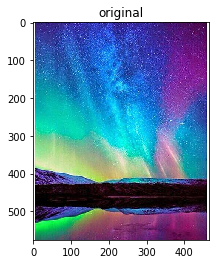

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import imageio 

img = imageio.imread('data/test1.jpg') 

plt.imshow(img)
plt.title('original')
plt.show()

In [24]:
features = np.zeros((img.shape[0] * img.shape[1], 5)) 
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        features[row*img.shape[1] + col, :] = np.array([row, col, 
            img[row, col, 0], img[row, col, 1], img[row, col, 2]])
features_normalized = features / features.max(axis = 0)

In [26]:
features_normalized

array([[0.        , 0.        , 1.        , 0.99607843, 1.        ],
       [0.        , 0.00215054, 1.        , 1.        , 0.99215686],
       [0.        , 0.00430108, 1.        , 1.        , 0.98431373],
       ...,
       [1.        , 0.99569892, 0.99607843, 1.        , 1.        ],
       [1.        , 0.99784946, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [27]:
def draw_segments(im, pixel_clusters):
    '''
    In : Image and pixel clusters from the k-mean algorithm 
    Output: Image with segmentations
    '''
    num_clusters = int(pixel_clusters.max()) + 1
    average_color = np.zeros((num_clusters, 3))
    cluster_count = np.zeros(num_clusters)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            cluster_count[c] += 1
            average_color[c, :] += im[i, j, :]

    for c in range(num_clusters):
        average_color[c,:] /= float(cluster_count[c])

    out_im = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            c = pixel_clusters[i,j]
            out_im[i,j,:] = average_color[c,:]

    return out_im

In [21]:
def kmeans(im, X, k): 
    '''
    In: Image, normalized array of feature and number of cluster(k)
    Out: Pixel Clusters
    '''
    sz = X.shape[0]
    init_cent_idx = np.random.choice(sz, k, replace=False)
    cent_X = X[init_cent_idx]

    distances = np.zeros((k, sz))
    assgn = np.zeros(sz)

    while(True):
        for i in range(k):
            distances[i, :] = np.linalg.norm(X - cent_X[i], axis=1)
        assgn = np.argmin(distances, axis=0)

        new_cent_X = np.zeros_like(cent_X)
        for i in range(k):
            new_cent_X[i] = np.mean(
            X[np.nonzero(assgn == i)],
            axis=0
          )
        if np.allclose(new_cent_X, cent_X):
            break

        cent_X = new_cent_X
    H, W, _ = im.shape
    return assgn.reshape((H, W))

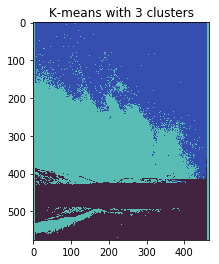

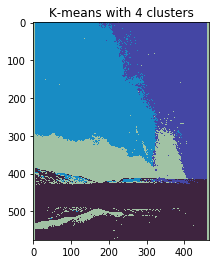

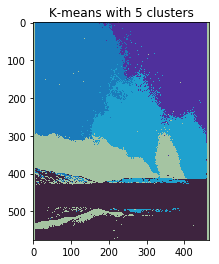

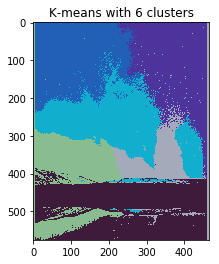

In [23]:
num_clusters = [3, 4, 5, 6]
for k in num_clusters:
    clustered_pixels = kmeans(img, features_normalized, k) 
    cluster_im = draw_segments(img, clustered_pixels)
    plt.imshow(cluster_im)
    plt.title('K-means with %d clusters' % k)
    plt.show()